#**Import Libraray**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#**Generate Data**

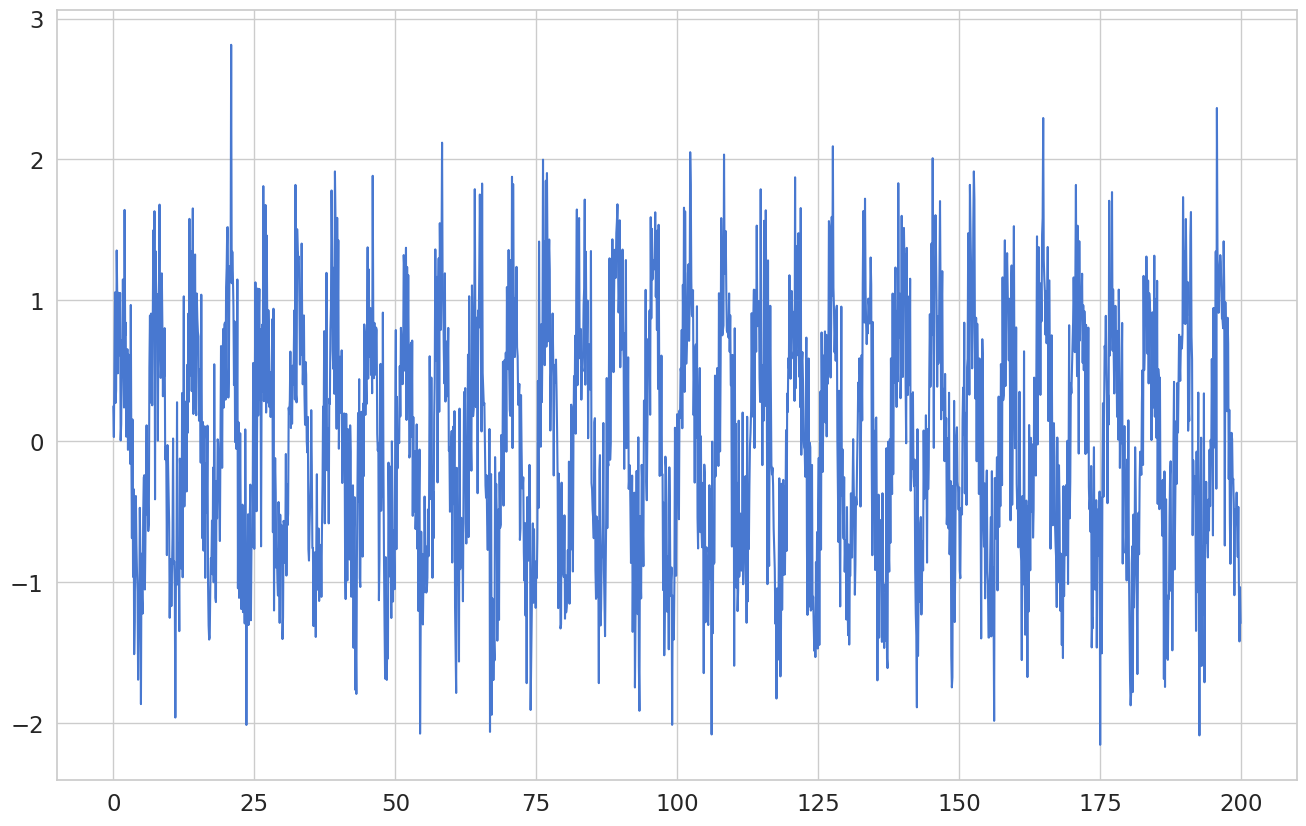

In [2]:
# Set up plotting styles
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10  # Set the figure size
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Generate synthetic sine wave data
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)');

#**Data Preprocessing**

In [3]:
# Create a DataFrame from the synthetic data
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])

# Split the data into training and test sets
len_train = int(len(data_full) * 0.8)
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]

# Function to generate data sequences
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)

# Generate training and test sequences
num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)

#**Creating the Sequential model**

In [4]:
# Build and compile the gru model
gru_model = keras.Sequential([
    keras.layers.GRU(128, input_shape=(trainX.shape[1], trainX.shape[2])),
    keras.layers.Dense(1)
])
gru_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

#**Model Training**

In [5]:
# Train the model
history = gru_model.fit(
    trainX, trainY,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)

Epoch 1/30
90/90 [==============================] - 15s 44ms/step - loss: 0.3569 - val_loss: 0.3639
Epoch 2/30
90/90 [==============================] - 2s 25ms/step - loss: 0.3185 - val_loss: 0.3599
Epoch 3/30
90/90 [==============================] - 2s 21ms/step - loss: 0.3169 - val_loss: 0.3554
Epoch 4/30
90/90 [==============================] - 2s 23ms/step - loss: 0.3162 - val_loss: 0.3529
Epoch 5/30
90/90 [==============================] - 1s 16ms/step - loss: 0.3159 - val_loss: 0.3516
Epoch 6/30
90/90 [==============================] - 1s 9ms/step - loss: 0.3156 - val_loss: 0.3508
Epoch 7/30
90/90 [==============================] - 1s 9ms/step - loss: 0.3153 - val_loss: 0.3500
Epoch 8/30
90/90 [==============================] - 1s 9ms/step - loss: 0.3148 - val_loss: 0.3491
Epoch 9/30
90/90 [==============================] - 1s 10ms/step - loss: 0.3141 - val_loss: 0.3480
Epoch 10/30
90/90 [==============================] - 1s 10ms/step - loss: 0.3134 - val_loss: 0.3468
Epoch 11/30

#**Evaluation**

13/13 [==============================] - 0s 2ms/step - loss: 0.0000e+00


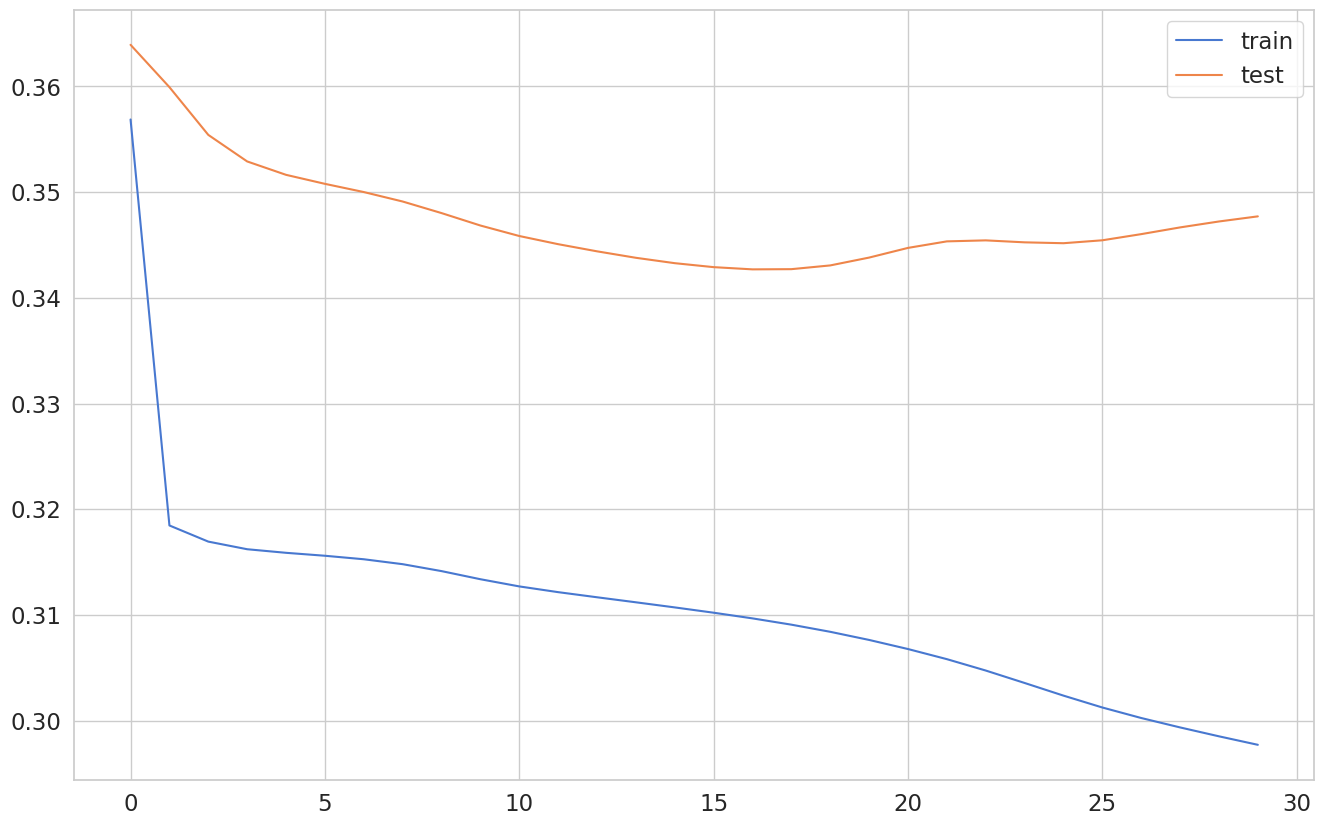

In [6]:
gru_model.evaluate(testX)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

#**Predicting a new Point in the Future**

13/13 [==============================] - 1s 5ms/step


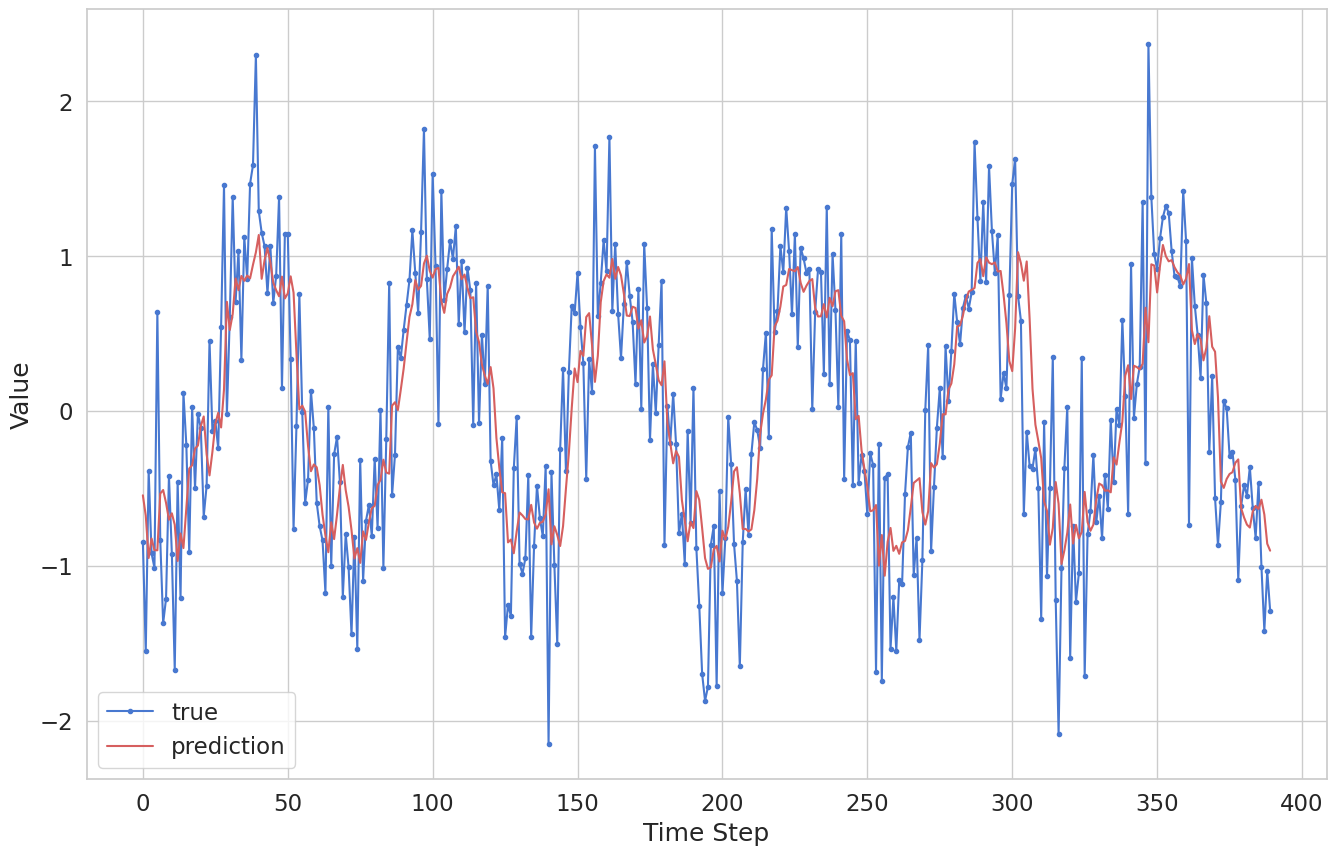

In [7]:
# Generate predictions
y_pred = gru_model.predict(testX)

# Plot true values vs. predictions
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Menghitung MSE
mse = mean_squared_error(testY, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.30627315989604303
Root Mean Squared Error (RMSE): 0.5534195152829751


In [9]:
from sklearn.metrics import classification_report

# Mengonversi nilai kontinu menjadi biner berdasarkan threshold (misalnya 0.5)
threshold = 0.5
binary_pred = (y_pred >= threshold).astype(int)
binary_testY = (testY >= threshold).astype(int)

# Mencetak classification report
print("Classification Report:")
print(classification_report(binary_testY, binary_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       258
           1       0.77      0.77      0.77       132

    accuracy                           0.85       390
   macro avg       0.83      0.83      0.83       390
weighted avg       0.85      0.85      0.85       390

